In [1]:
import os 
import sys
from pathlib import Path 
sys.path.insert(1 ,os.path.dirname(Path(os.path.abspath("__file__")).resolve().parent))

# Python imports
from dotenv import load_dotenv
from IPython.display import Image, display

# Langchain imports
from langchain_core.runnables.graph import MermaidDrawMethod

# Langgraph imports
from langgraph.graph import MessagesState, StateGraph, START

# App imports
from app.agents.utils import *
from app.agents.researcher import *
from app.agents.writer import *

# Load environment variables
load_dotenv()

True

In [2]:
workflow = StateGraph(MessagesState)
workflow.add_node("researcher", research_node)
workflow.add_node("writer", writer_node)

workflow.add_edge(START, "writer")
graph = workflow.compile()

In [3]:
events = graph.stream(
    {
        "messages": [
            (
                "user",
                "Talk about UK's GDP over the past 5 years"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'writer': {'messages': [HumanMessage(content="Talk about UK's GDP over the past 5 years", additional_kwargs={}, response_metadata={}, id='7724a2e5-45a4-4b2b-925d-695023a5dcf9'), HumanMessage(content="To provide an overview of the UK's GDP over the past five years, I will summarize the trends and key events that have influenced economic performance during this period.\n\n1. **2018**: The UK's GDP growth was relatively stable, with a growth rate of around 1.4%. The economy was influenced by ongoing Brexit negotiations, which created uncertainty in the market.\n\n2. **2019**: The growth rate slowed to approximately 1.3%. The uncertainty surrounding Brexit continued to impact business investment and consumer confidence. However, the services sector remained a significant contributor to GDP.\n\n3. **2020**: The COVID-19 pandemic had a dramatic effect on the UK economy, leading to a contraction of about 9.8% in GDP, one of the largest declines among major economies. Lockdowns and restrictio

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/UK%20GDP%20TRENDS%202023?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=UK+GDP+TRENDS+2023&crumb=BmKVZrcx0z5


{'researcher': {'messages': [HumanMessage(content="Talk about UK's GDP over the past 5 years", additional_kwargs={}, response_metadata={}, id='7724a2e5-45a4-4b2b-925d-695023a5dcf9'), HumanMessage(content="To provide an overview of the UK's GDP over the past five years, I will summarize the trends and key events that have influenced economic performance during this period.\n\n1. **2018**: The UK's GDP growth was relatively stable, with a growth rate of around 1.4%. The economy was influenced by ongoing Brexit negotiations, which created uncertainty in the market.\n\n2. **2019**: The growth rate slowed to approximately 1.3%. The uncertainty surrounding Brexit continued to impact business investment and consumer confidence. However, the services sector remained a significant contributor to GDP.\n\n3. **2020**: The COVID-19 pandemic had a dramatic effect on the UK economy, leading to a contraction of about 9.8% in GDP, one of the largest declines among major economies. Lockdowns and restri

In [4]:
events = graph.stream(
    {
        "messages": [
            (
                "user",
                "What is the current weather in New York?"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'writer': {'messages': [HumanMessage(content='What is the current weather in New York?', additional_kwargs={}, response_metadata={}, id='aaefacbf-1ff3-4039-b0ad-d15cb972cdb0'), HumanMessage(content="I can't provide real-time weather updates. However, you can check a reliable weather website or app for the current weather in New York.", additional_kwargs={}, response_metadata={}, name='writer', id='6328543b-e9be-4a43-be40-a5f31b6b7cda')]}}
----
{'researcher': {'messages': [HumanMessage(content='What is the current weather in New York?', additional_kwargs={}, response_metadata={}, id='aaefacbf-1ff3-4039-b0ad-d15cb972cdb0'), HumanMessage(content="I can't provide real-time weather updates. However, you can check a reliable weather website or app for the current weather in New York.", additional_kwargs={}, response_metadata={}, name='writer', id='6328543b-e9be-4a43-be40-a5f31b6b7cda'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_v1RQFFnVHP3XjC1TZtkDKoem', 'function

In [5]:
events = graph.stream(
    {
        "messages": [
            (
                "user",
                "What is Civil Engineering?"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'writer': {'messages': [HumanMessage(content='What is Civil Engineering?', additional_kwargs={}, response_metadata={}, id='a74aac12-ea62-49d5-be95-c98bb45c0681'), HumanMessage(content='FINAL ANSWER: This subject cannot be discussed.', additional_kwargs={}, response_metadata={}, name='writer', id='ca806a9a-a0c4-4541-af1f-8364d371026d')]}}
----


In [6]:
response = graph.invoke(
    {
        "messages": [
            (
                "user",
                "What is Civil Engineering?"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150}
)
response

{'messages': [HumanMessage(content='What is Civil Engineering?', additional_kwargs={}, response_metadata={}, id='26a313cf-b250-4b9d-ba34-40d0940a8ecf'),
  HumanMessage(content='FINAL ANSWER: This subject cannot be discussed.', additional_kwargs={}, response_metadata={}, name='writer', id='4e5da648-5e7c-479a-a790-6b6a30bdff1b')]}

In [7]:
response.get("messages")[-1].content.split("FINAL ANSWER: ")[-1]

'This subject cannot be discussed.'

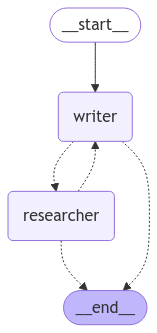

In [8]:
image = graph.get_graph().draw_mermaid_png(
    draw_method=MermaidDrawMethod.API,
)

# Display the image
display(Image(image))

# Save the image to a file
with open("../graph_output.png", "wb") as f:
    f.write(image)